# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_json = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city = city_weather_json["name"] 
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
            
        city_data.append({"Name": city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | tonatico
Processing Record 5 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 1 | west wendover
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | havre-saint-pierre
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | torbay
Processing Record 22

Processing Record 36 of Set 4 | hay river
Processing Record 37 of Set 4 | kirakira
Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | northam
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | san jose
Processing Record 42 of Set 4 | manaure
Processing Record 43 of Set 4 | port macquarie
Processing Record 44 of Set 4 | puerto lempira
Processing Record 45 of Set 4 | los llanos de aridane
Processing Record 46 of Set 4 | beatrice
Processing Record 47 of Set 4 | torres
Processing Record 48 of Set 4 | kotido
Processing Record 49 of Set 4 | bacuit
City not found. Skipping...
Processing Record 0 of Set 5 | tondano
Processing Record 1 of Set 5 | dhidhdhoo
Processing Record 2 of Set 5 | harper
Processing Record 3 of Set 5 | bathsheba
Processing Record 4 of Set 5 | paveh
Processing Record 5 of Set 5 | emmett
Processing Record 6 of Set 5 | dudinka
Processing Record 7 of Set 5 | richards bay
Processing Record 8 of Set 5 | t

Processing Record 22 of Set 8 | tessalit
Processing Record 23 of Set 8 | marzuq
Processing Record 24 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 25 of Set 8 | derzhavinsk
Processing Record 26 of Set 8 | nanakuli
Processing Record 27 of Set 8 | vila
Processing Record 28 of Set 8 | port-gentil
Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | ajdabiya
Processing Record 31 of Set 8 | jose de freitas
Processing Record 32 of Set 8 | hamilton
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 35 of Set 8 | san joaquin
Processing Record 36 of Set 8 | rupert
Processing Record 37 of Set 8 | aracaju
Processing Record 38 of Set 8 | thinadhoo
Processing Record 39 of Set 8 | kloulklubed
Processing Record 40 of Set 8 | yumen
Processing Record 41 of Set 8 | ternate
Processing Record 42 of Set 8 | banda aceh
Processing Record 43 of Set 8 | palmer
Processing Record 44 of Set 8 | ko

Processing Record 11 of Set 12 | asino
Processing Record 12 of Set 12 | urulga
City not found. Skipping...
Processing Record 13 of Set 12 | pochutla
Processing Record 14 of Set 12 | skelleftea
Processing Record 15 of Set 12 | canby
Processing Record 16 of Set 12 | udachnyy
Processing Record 17 of Set 12 | aksu
Processing Record 18 of Set 12 | wellington
Processing Record 19 of Set 12 | jiroft
City not found. Skipping...
Processing Record 20 of Set 12 | egvekinot
Processing Record 21 of Set 12 | pangnirtung
Processing Record 22 of Set 12 | huarmey
Processing Record 23 of Set 12 | port keats
Processing Record 24 of Set 12 | uchiza
Processing Record 25 of Set 12 | santa maria
Processing Record 26 of Set 12 | whitehorse
Processing Record 27 of Set 12 | srebrenica
Processing Record 28 of Set 12 | uribia
Processing Record 29 of Set 12 | aden
Processing Record 30 of Set 12 | colac
Processing Record 31 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 32 of Set 12 | henties

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Name          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,-4.80,58,44,2.32,US,1675297699
1,Hobart,-42.8794,147.3294,17.81,51,75,5.66,AU,1675297809
2,Saskylakh,71.9167,114.0833,-24.25,98,100,3.50,RU,1675297863
3,Tonatico,21.4911,-98.8127,15.42,90,100,0.34,MX,1675297864
4,West Wendover,40.7391,-114.0733,-2.44,54,0,2.06,US,1675297865


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("Starter_Code/output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Albany,42.6001,-73.9662,-4.80,58,44,2.32,US,1675297699
1,Hobart,-42.8794,147.3294,17.81,51,75,5.66,AU,1675297809
2,Saskylakh,71.9167,114.0833,-24.25,98,100,3.50,RU,1675297863
3,Tonatico,21.4911,-98.8127,15.42,90,100,0.34,MX,1675297864
4,West Wendover,40.7391,-114.0733,-2.44,54,0,2.06,US,1675297865


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

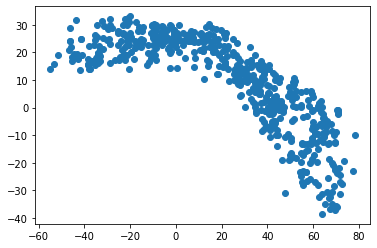

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

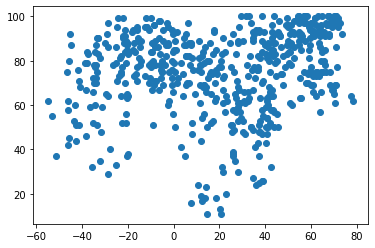

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

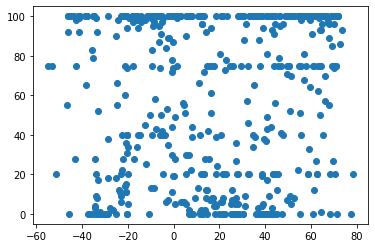

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

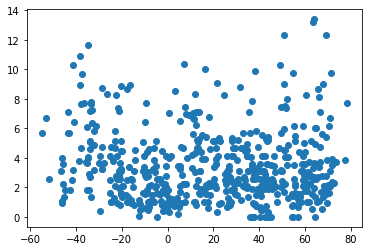

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE